In [1]:
import re
import json
import matplotlib.pyplot as plt
import codecs
import numpy as np
import jieba

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
    '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
    '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
    '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def load_nerDict(fname):
    nerDict, cnt = [], 0
    with open(fname, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                cnt += 1
                # print(line)
                nerDict.append(line.strip())
            # if cnt == 2:
            #     break
    print(cnt)
    return nerDict

def get_new_ner(fname):
    ner = set()
    with open(fname, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            entities = data['coreEntityEmotions']
            for a in entities:
                if len(a['entity']) < 9:
                    ner.add(a['entity'])
    return ner

def not_empty(s):
    return s and s.strip()

def clean_text(text):
    for p in puncts:
        text = text.replace(p, ' ')
    return text

def load_train_data(train_file, ner_file):
    
    ner = get_new_ner(train_file)
    nerDict = load_nerDict(ner_file)
    
    for i in ner:
        if i not in nerDict:
            nerDict.append(i)
#     print(len(nerDict))
    
    #更新jieba的词库
    word_invalid = []
    for i in nerDict:
        try:
            jieba.add_word(i)
        except:
            word_invalid.append(i)
    
    content_word = []
    with open(train_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            text = clean_text(data['content'].strip())
            content = jieba.lcut(text)
            content = list(filter(not_empty, content))
#             while ' 'in content:
#                 content.remove(' ')
#             content = [ i.strip() for i in content]
            content_word.append(content)

    return nerDict, content_word, word_invalid

In [2]:
basedir = '../input_data'
train_file = basedir + '/coreEntityEmotion_train.txt' 
test_file = basedir + '/coreEntityEmotion_test_stage1.txt'
ner_file = basedir + '/nerDict.txt'
stop_words_file = basedir + '/stop_words_mine.txt'

nerDict, content_word, word_invalid = load_train_data(train_file, ner_file)
print(len(nerDict))
print(len(content_word))
print(len(word_invalid))

311284


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\iwin\AppData\Local\Temp\jieba.cache
Loading model cost 0.746 seconds.
Prefix dict has been built succesfully.


321016
40000
0


['第十七届', '上海', '国际', '工业自动化', '及', '机器人', '展与', '上海', '智能工厂', '展览会', '于', '2019', '年', '3', '月', '1', '日', '圆满', '落下', '帷幕', '。', '展会', '展出', '规模', '907', '62', '平方米', '国内外', '参展', '厂商', '达', '1000', '多家', '并', '吸引', '超过', '100000', '名', '专业', '观众', '前来', '参观', '。', '此次', '展会', '全面', '展示', '了', '工业自动化', '技术', '工业', '装配', '与', '传输技术', '工业机器人', '整机', '与', '零部件', '机器视觉', '工业', '应用', 'agv', '无人', '搬运', '智慧工厂', '解决方案', '工业自动化', '全面', '解决方案', '等', '产品', '领域', '。', '无论是', '展会', '规模', '展示', '范围', '以及', '专业', '观众', '的', '人数', '都', '实现', '了', '快速', '的', '增长', '极大', '地', '推动', '了', '我国', '制造业', '的', '转型', '升级', '和', '跨越', '发展', '！', '誉洋', '3d', '机器视觉', '引', '发展', '会', '参观', '热潮', '在', '大连', '誉洋', '工业', '智能', '的', '展位', '机器人', '自动', '抓取', '物件', '让', '人', '眼前一亮', '。', '机器人', '在', '3d视觉', '的', '引导', '下', '精准定位', '杂乱无序', '的', '目标', '并', '实现', '准确', '快速', '抓取', '整个', '过程', '井然有序', '无需', '任何', '人工干预', '。', '誉洋', '现场', '工程师', '介绍', '制造', '企业', '采用', '誉洋', 'k', 'in', 'eye', '3d', '机器视觉', '系统', '以往', '繁琐'

(array([  2.,   2.,   3.,   1.,  12.,  28.,  89., 123., 127., 164., 160.,
        183., 221., 198., 209., 188., 161., 199., 187., 180., 241., 253.,
        251., 276., 261., 361., 327., 355., 336., 330., 319., 392., 348.,
        313., 383., 364., 406., 391., 395., 435., 412., 368., 436., 401.,
        416., 413., 437., 430., 471., 363., 387., 416., 427., 402., 362.,
        434., 390., 381., 324., 394., 389., 420., 451., 423., 443., 421.,
        373., 388., 384., 368., 329., 319., 328., 355., 268., 307., 309.,
        299., 313., 282., 293., 308., 277., 215., 272., 278., 212., 236.,
        228., 208., 233., 186., 214., 186., 181., 187., 197., 179., 170.,
        132., 170., 168., 151., 173., 173., 147., 128., 148., 140., 128.,
        137., 112., 120., 129., 137., 125., 118., 135., 121., 110., 106.,
        108., 105., 115.,  92., 107.,  87., 105.,  85.,  86.,  85.,  99.,
         99.,  87.,  84.,  83.,  94.,  99.,  94.,  76.,  83.,  75.,  93.,
         69.,  75.,  79.,  72.,  82., 

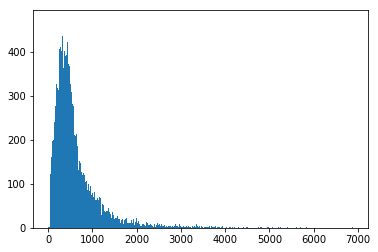

In [3]:
print(content_word[0])

content_word_len = [len(i) for i in content_word]

print("min:{}".format(np.min(content_word_len)))
print("max:{}".format(np.max(content_word_len)))
print("mean:{}".format(np.mean(content_word_len)))
print("median:{}".format(np.median(content_word_len)))
print("std:{}".format(np.std(content_word_len)))
plt.hist(content_word_len, bins=1000)

In [4]:
cnt = 0
for i in content_word:
    if len(i) > 4000:
        cnt += 1
print(cnt)

93


In [5]:
cnt = 0
for i in content_word:
    if len(i) > 3000:
        cnt += 1
print(cnt)

339


In [6]:
cnt = 0
for i in content_word:
    if len(i) > 2600:
        cnt += 1
print(cnt)

555


In [7]:
cnt = 0
for i in content_word:
    if len(i) > 2500:
        cnt += 1
print(cnt)

625


In [8]:
cnt = 0
for i in content_word:
    if len(i) == 3:
        cnt += 1
        print(len(i),i)
print(cnt)

0


In [9]:
cnt = 0
for i in content_word:
    if len(i) < 50:
        cnt += 1
        print(len(i),i)
print(cnt)

49 ['版本', '预告', '极客', '体育', '苹果', '内测版', '正式', '上线', '赶紧', '来看', '！', '经过', '几个月', '以来', '的', '不断', '开发', '和', '实验', '极客', '体育', '苹果', '内测版', '在', '今天', '正式', '上线', '了', '更', '多功能', '更', '多', '推荐', '欢迎', '下载', '更新', '查看', '！', '具体', '更新', '操作', '如下', '1', '卸载', '极客', '体育', 'app', '。', 'ajingcai01']
44 ['针对', '上海蚂蚁韵保保险代理有限公司', '发生', '工商信息', '变更', '企业', '目前', '显示', '已经', '注销', '。', '蚂蚁金服', '回应', '称', '该', '公司', '没有', '实际', '投入', '运营', '为了', '节省', '社会', '资源', '所以', '注销', '的', '和', '公司', '实际', '业务', '运营', '无关', '属', '正常', '公司管理', '动作', '。', '蚂蚁韵保', '由', '浙江蚂蚁小微金融服务集团股份有限公司', '100', '控股', '。']
44 ['【', '新华保险', '陈国平', '拟任', '复星保德信', 'ceo', '】', '财联社', '3', '月', '8', '日讯', '新华保险浙江分公司', '总经理', '陈国平', '拟任', '复星保德信人寿', 'ceo', '。', '公开', '资料', '显示', '新华保险浙江分公司经原保监会行', '批准', '于', '2001', '年', '4', '月', '正式', '开业', '是', '新华人寿保险公司', '最初', '在', '全国', '设立', '的', '十家', '省级', '分公司', '之一', '。', '21世纪经济报道']
30 ['【', '步步', '先', '全品类', '】', '当下', '谁', '最', '赚钱', '？', '三开', '皮卡', '表示', '不服', '！', '您', '喜欢', 

45 ['【', '爱奇艺', '娱乐', 'x', '《', '都挺好', '》', '】', '🎙', '️', '独家', '专访', '姚晨', '🎙', '️', '角色', '苏明玉', '反', '传统', '会', '引发', '共鸣', '苏父', '关系', '复杂', '倪大红', '生活', '中', '害羞', '二弟', '视其为', '扫帚星', '不', '承认', '对', '其', '有', '爱', '猛', '戳', '阅读', '原文', '看', '完整版', '专访']
7 ['回复', '关键词', '【', '微博用户发展报告', '】', '即可', '！']
34 ['新浪财经讯', '晶晨半导体', '成为', '科创板', '001', '号', '受理企业', '！', '晶晨半导体', '上海', '股份有限公司', '拟', '申请', '在', '上交所', '科创板上市', '。', '该', '公司', '上市辅导', '券商', '为', '国泰君安', '。', '相关', '消息', '国泰君安保荐', '企业', '拿下', '科创板', '001', '号', '受理', '批文']
44 ['2018', '年', '第', '四季度财报', '显示', '微博', '月活跃用户', '4', '62', '亿', '连续', '三年', '增长', '7000', '万', '；', '微博', '垂直领域', '数量', '扩大', '至', '60', '个', '月', '阅读量', '过', '百亿', '领域', '达', '32', '个', '。', '本报告', '全面', '诠释', '微博用户', '发展', '状况', '宏观', '解读', '垂直领域', '发展', '规模', '。']
48 ['丰田锐志', '雾灯', '透镜', '亮野', '雾灯', '双光', '透镜', '灯泡', '波哥', '三恒', '30', '00k', '氙气灯', '套装', '安定', '器', '波哥', '快启', '安定', '锐志', '升级', '的', '方法', '很多', '圆形', '的', '雾灯', '双光', '透镜', '也', '是',

In [12]:
cnt = 0
for i in content_word:
    if len(i) < 20:
        cnt += 1
        print(len(i),i)
print(cnt)

12 ['不到', '3k', '的', '8', '55', '手机', '做工', '是否', '缩水', '？', 'iqoo', '拆解评测']
1 ['end']
16 ['今天', '小福', '给', '大家', '介绍', '下', '高压隔离开关', '与', '高压负荷开关', '大家', '多多', '关注', '兴福园', '电力', '哦', '～']
13 ['作者', '国金策略', '李立峰', '团队', '来源', '策略', '李立峰', '与', '行业', '配置', '笔记', '报告', '正文']
7 ['回复', '关键词', '【', '微博用户发展报告', '】', '即可', '！']
16 ['校园环境', '无论', '你', '从何而来', '热文', '围观', '北广', '之星', '2019', '年', '新生', '集训', '丨', '报名', 'now', '回复']
6


In [14]:
cnt = 0
for i in content_word:
    if len(i) > 2000:
        cnt += 1
        print(len(i))
print(cnt)

3297
2092
4302
3931
2331
3220
2969
3118
2146
4065
2165
2143
2675
3273
2031
4054
2074
2219
2532
2122
2141
2332
2507
2452
2369
3259
2115
2718
2209
2221
4819
3081
4443
2045
2703
4168
3376
2468
2374
4442
2876
2673
2434
2143
2341
2752
2491
2747
3347
2389
2326
2787
2145
2871
3771
2242
3311
2921
2234
2824
2225
2449
2307
2413
3007
2509
2044
2733
2211
2811
2255
2975
3211
4300
3642
2081
2383
2374
3849
4107
3410
4207
2419
3758
2388
4054
2244
3831
3851
2198
2529
2419
2106
2642
4072
4782
4584
2370
5128
5839
2588
4541
2929
2799
3324
3748
3130
4264
2860
2297
2451
4506
2589
3113
2513
2271
3308
4370
3566
3917
3436
3391
2010
2259
4241
4088
2214
2911
2958
3244
3482
3321
2814
3206
2633
2900
2013
3142
2402
2312
2896
2135
3481
2009
2405
2038
2315
2193
2848
2940
2965
2243
2872
3321
2373
2390
2263
2276
2249
2139
2023
2116
4767
2467
2254
4026
2934
2404
2380
2238
2723
2246
2954
2175
2069
2253
3274
2680
2120
3255
2854
2186
5698
2894
2284
2055
2811
2612
2010
2690
2492
3780
2044
2031
2192
2424
2013
2820
3209
2154


In [30]:
print("文本长度累积分布,{}的文本少于{}个词".format(85, np.percentile(content_word_len, 85)))
print("文本长度累积分布,{}的文本少于{}个词".format(90, np.percentile(content_word_len, 90)))
print("文本长度累积分布,{}的文本少于{}个词".format(95, np.percentile(content_word_len, 95)))
print("文本长度累积分布,{}的文本少于{}个词".format(98, np.percentile(content_word_len, 98)))

文本长度累积分布,85的文本少于1011.0个词
文本长度累积分布,90的文本少于1235.0个词
文本长度累积分布,95的文本少于1666.0个词
文本长度累积分布,98的文本少于2309.019999999997个词
